# import全部のせ

In [1]:
import pandas as pd  # データ分析ライブラリ
import numpy as np  # 数値計算ライブラリ
import scipy as sp  # 統計計算ライブラリ
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image #画像ファイル読み書き
import os
import sys
import glob
from matplotlib.colors import Normalize
from matplotlib.colors import LogNorm 
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import shutil
from PIL import Image, ImageDraw, ImageFont
from skimage import data
from sklearn.cluster import KMeans
from collections import OrderedDict #データフレームをまとめるOrderedDict
from tqdm import tqdm #プログレスバーの表示
from sklearn.decomposition import PCA #主成分分析用

class Plot: #ちょっとした描画用クラス
    def __init__(self):
        pass
    
    def figinit(self,wpix=1280,hpix=960): #図の大きさを定義
        self.fig = plt.figure(figsize=(wpix/100, hpix/100), dpi=100,facecolor='w', linewidth=0, edgecolor='w')
        self.ax = self.fig.add_subplot(1,1,1)
        
    def figout(self,savename):
        self.fig.savefig(savename)  #最後に名前をつけて、保存する
    

# PCA/POD(主成分分析)する

In [2]:
path = "csv/pcasample.csv"
df = pd.read_csv(path,index_col = 0)
dfT = df.T #転置した物を用意。元のベクトル情報を取り出す時はこっちのほうが使いやすい

In [3]:
#解析の対象となるデータフレームは、
#行方向(index)にサンプル番号、列方向(column)にベクトル情報が入るように作る。
#この例だと、サンプル数は255個で、それぞれ200要素のベクトルデータを持っている
df 

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,13.388437,13.263160,13.079010,12.764197,12.476204,12.330301,12.242505,12.166663,11.820932,11.424563,...,7.302648,7.134969,7.405205,7.530751,7.735754,7.976484,8.041970,7.929140,7.699312,7.456788
1,13.891149,13.613052,13.109186,12.626650,12.219837,12.134317,12.256054,12.576684,12.644122,12.440018,...,6.720025,6.796559,6.778340,6.809460,6.886710,6.972807,6.922141,6.908481,7.124385,8.125281
2,13.500564,13.115850,13.070033,12.864372,12.302451,11.900530,11.874276,11.617675,10.942132,10.205414,...,7.196509,7.342089,6.944299,6.439709,5.944811,5.874480,5.771408,6.102314,7.152859,8.478775
3,13.220621,13.095923,12.777351,12.288015,11.730079,11.286862,11.174805,11.250662,11.588434,12.063250,...,5.856061,5.636653,5.581186,5.753648,5.936246,6.047127,6.212085,6.128961,6.414276,6.823877
4,9.737077,9.418251,9.044159,8.648419,7.921619,8.161932,8.667882,8.913602,8.614157,8.218786,...,6.397092,6.681744,6.745379,6.183535,6.018819,5.761903,6.054381,7.727568,9.762294,11.224868
5,15.228419,14.066173,13.173272,12.743644,12.549358,11.679624,11.243199,11.545763,11.537474,11.377478,...,6.372120,6.892291,6.480747,5.480368,5.961650,6.452924,6.732094,6.942692,7.645176,9.490890
6,13.751336,13.498335,12.990635,12.467606,11.779875,11.855009,12.245594,12.002224,11.989801,12.317208,...,9.211828,8.156195,6.766315,7.116403,6.887907,6.359610,6.830006,6.985941,7.249177,9.016195
7,8.902390,8.512090,8.336396,8.854877,9.714684,9.909975,11.012002,11.273493,10.525901,10.146773,...,5.744196,5.710605,5.194419,4.540930,4.213157,4.070668,6.622268,7.927032,10.344427,11.820630
8,13.464270,13.478029,13.048257,12.543551,12.367310,12.491530,12.491433,12.293086,12.085807,12.076479,...,5.743130,5.511688,5.324413,5.444489,6.813497,8.781156,10.528283,11.953499,12.178718,11.048757
9,12.918953,12.177280,10.931570,9.701683,9.244931,9.405893,9.731148,10.056403,10.287413,10.270848,...,5.000182,4.852795,4.465564,5.264520,7.867707,10.048431,11.898179,12.669886,11.807999,10.347153


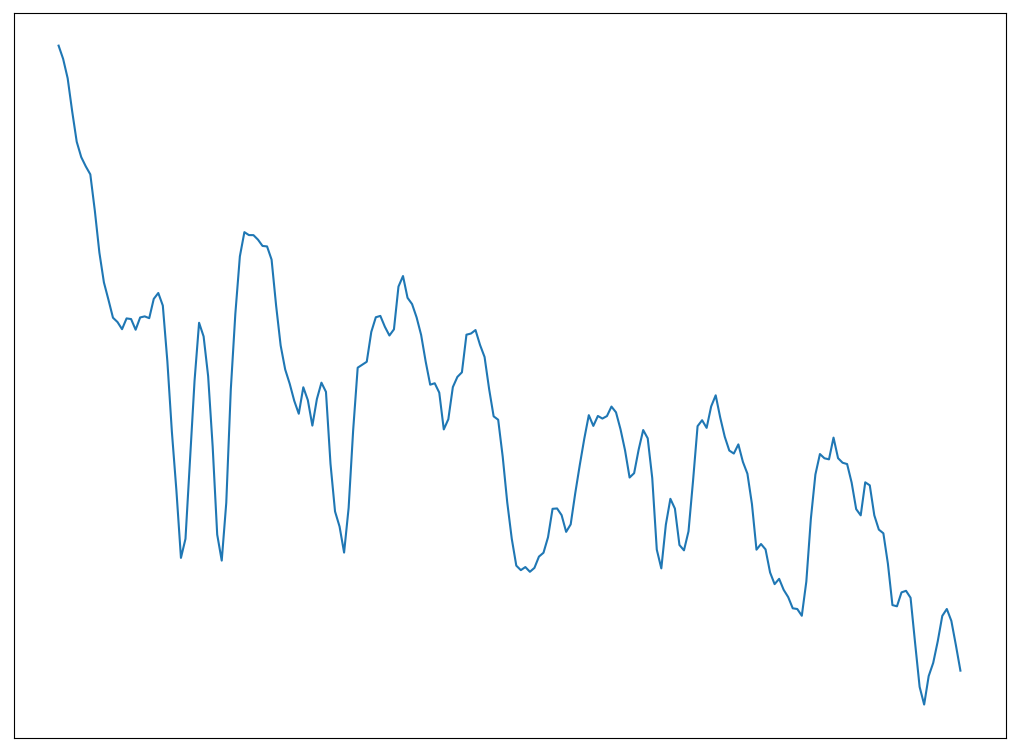

あるサンプルの形状の例


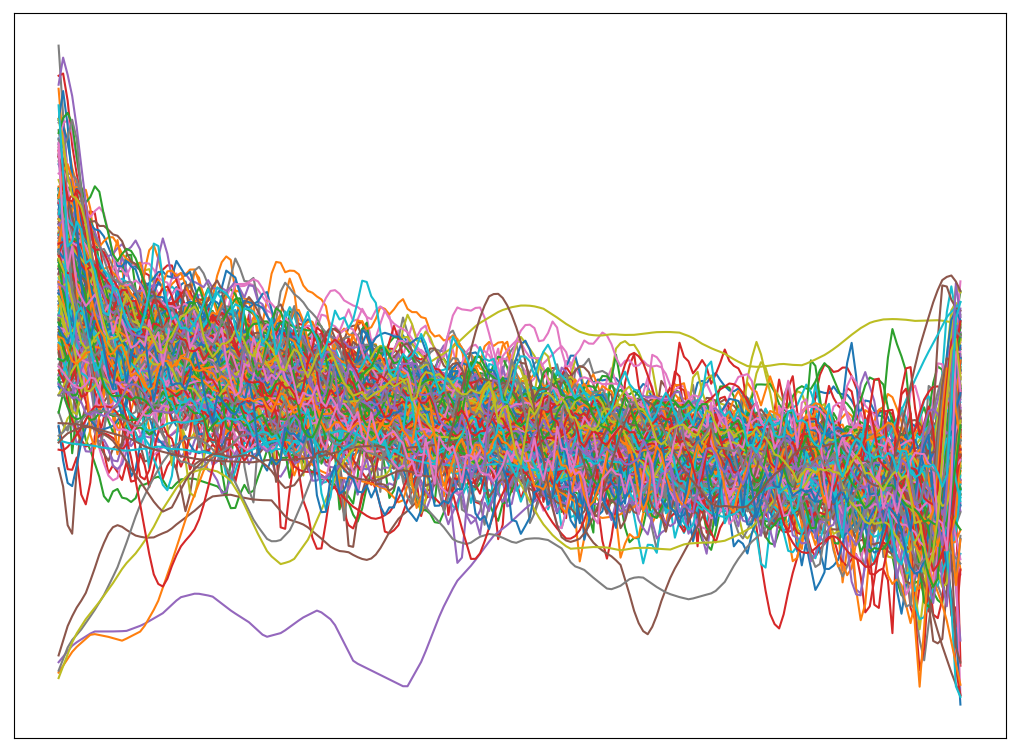

サンプル全部描画


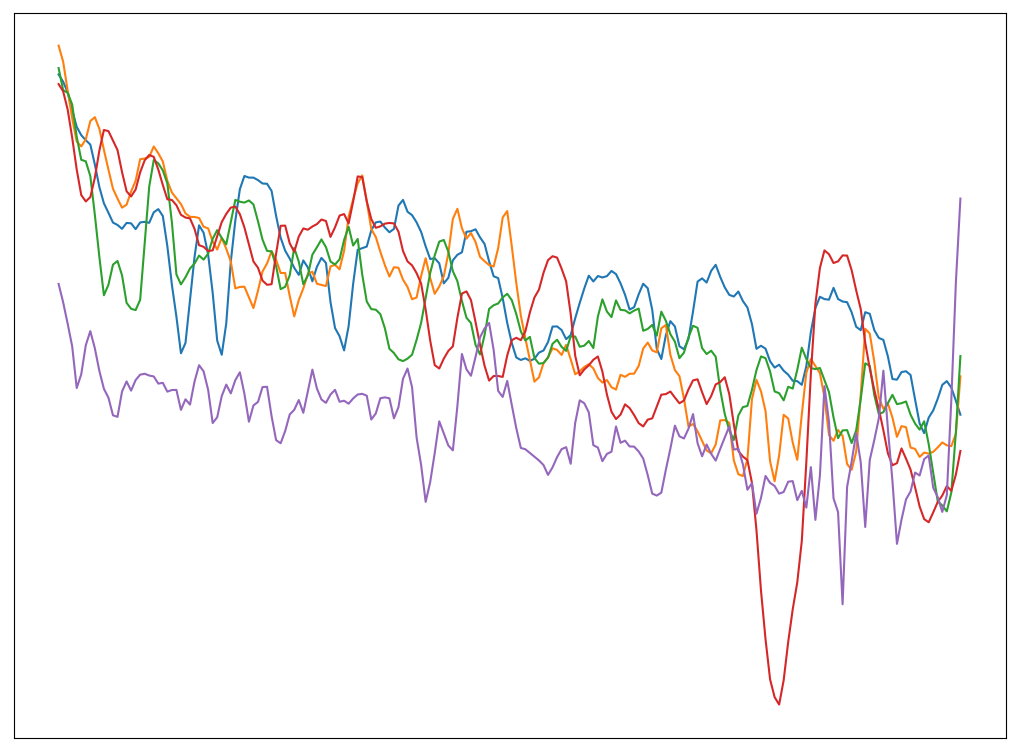

サンプル5個描画


In [4]:
#どんな感じのデータかチェック。
plot = Plot()
x = dfT.index.tolist()
plot.figinit()
plot.ax.set_yticks([]); plot.ax.set_xticks([])
y = dfT[0].tolist()
plot.ax.plot(x,y)
plt.show()
print("あるサンプルの形状の例")
plot.figinit()
plot.ax.set_yticks([]); plot.ax.set_xticks([])
for i in np.arange(len(dfT)):
    y = dfT[i].tolist()
    plot.ax.plot(x,y)
plt.show()
print("サンプル全部描画")
plot.figinit()
plot.ax.set_yticks([]); plot.ax.set_xticks([])
for i in np.arange(5):
    y = dfT[i].tolist()
    plot.ax.plot(x,y)
plt.show()
print("サンプル5個描画")

In [5]:
#PCAの処理を行う。
pcadf = df.values #PCAの解析はnp.arrayの形式でやる。pd.DataFrameから変換

pca = PCA()
pca.fit(pcadf) #pcadf というデータについて主成分分析実行
vals = pca.transform(pcadf) #データを主成分空間に写像。
#要するに各固有値に対応する係数
meanvec = pca.mean_ #主成分分析の平均値。1次元配列で、入力のベクトルと同じ大きさ
eigenvecs = pca.components_ #主成分分析の固有ベクトル。2次元配列で、入力ベクトルの個数 * 入力ベクトルの個数

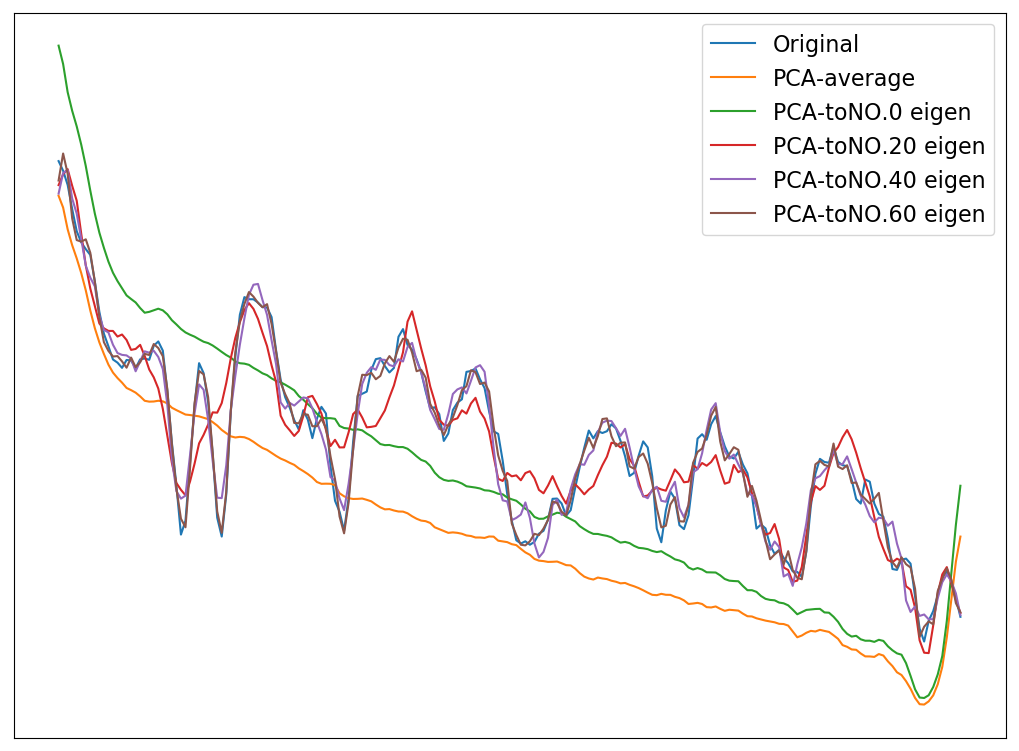

In [6]:
#出てきた固有ベクトルを使って再構成してみる。
i = 0 #
plot = Plot()
x = dfT.index.tolist()
plot.figinit()
plot.ax.set_yticks([]); plot.ax.set_xticks([])
y = dfT[0].tolist()
plot.ax.plot(x,y,label="Original")
y2 = np.zeros(len(y))
y2 += meanvec
plot.ax.plot(x,y2,label="PCA-average")
for eigen in np.arange(61):
    y2 += eigenvecs[eigen] * vals[i,eigen]
    if eigen % 20 == 0:
        plot.ax.plot(x,y2,label=f"PCA-toNO.{eigen} eigen")
plot.ax.legend(bbox_to_anchor=(1, 1), loc='upper right', fontsize=16) #凡例表示の設定
plt.show()

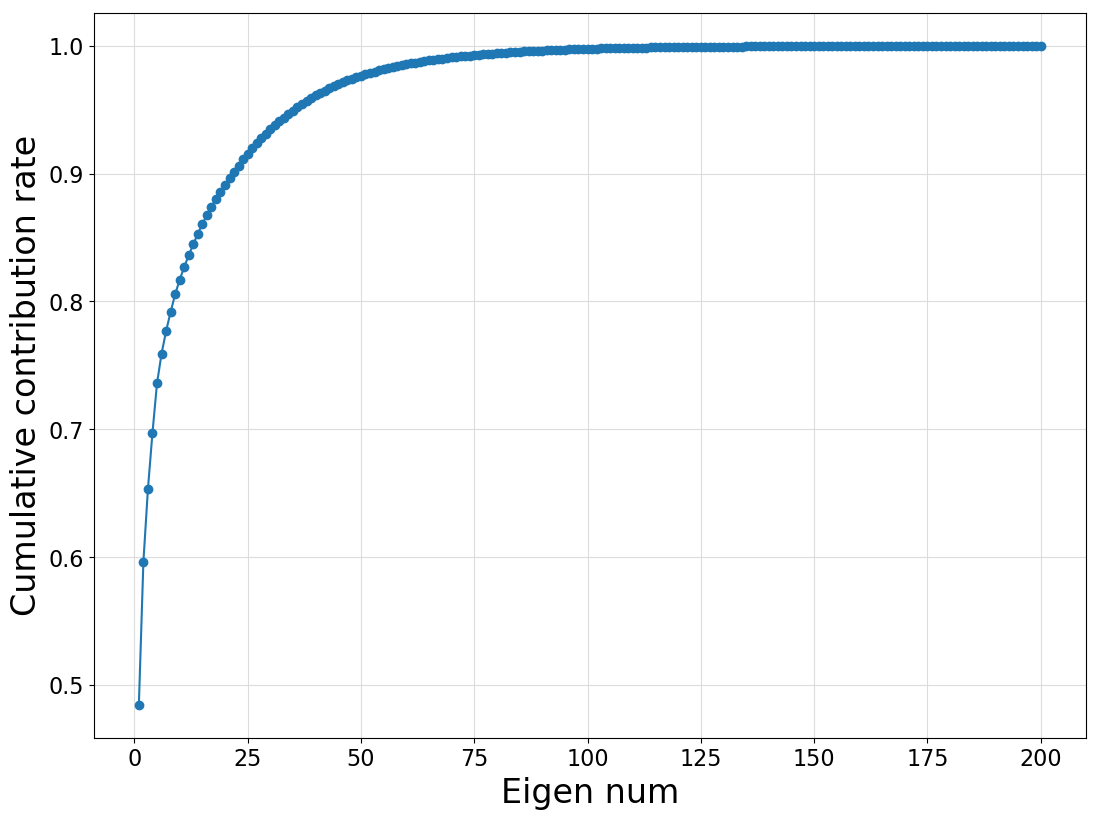

In [7]:
#寄与率を出してみる
contributionrate = pd.DataFrame(pca.explained_variance_ratio_, columns={"val"})

#累積寄与率を愚直に求める
contributionrate.at[0,"accum"] = contributionrate.at[0,"val"]

for i in np.arange(1,len(contributionrate)):
    contributionrate.at[i,"accum"] = contributionrate.at[i-1,"accum"] \
    + contributionrate.at[i,"val"]
contributionrate["index"] = contributionrate.index + 1
plot.figinit()
plot.ax.plot("index","accum",data=contributionrate,marker="o")
plot.ax.tick_params(labelsize=16)
plot.ax.set_ylabel("Cumulative contribution rate", fontsize=24)
plot.ax.set_xlabel("Eigen num", fontsize=24)
plot.ax.grid(color='gainsboro') #X、Y両方のグリッドを色指定しながら表示する。